<a href="https://colab.research.google.com/github/natadh/Decision_Trees/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VERTABRATE DATASET (IN CLASS)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/vertebrate(4).csv', header = 'infer')

In [3]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


It is a multi class data, we need to make it to a binary class


In [4]:
data['Class']=data['Class']. replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'non-mammals')

In [5]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [6]:
pd.crosstab([data[ 'Warm-blooded'], data[ 'Gives Birth']], data[ 'Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [7]:
from sklearn import tree

In [8]:
y=data['Class']

In [9]:
y

,Class
0,mammals
1,non-mammals
2,non-mammals
3,mammals
4,non-mammals
5,non-mammals
6,mammals
7,non-mammals
8,mammals
9,non-mammals


In [10]:
X = data.drop(['Name','Class'], axis = 1)

In [11]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [12]:
clf=tree. DecisionTreeClassifier(criterion='entropy' ,max_depth=3)

In [13]:
clf #initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
clf=clf.fit(X,y)

In [15]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
import pydotplus

In [17]:
from IPython.display import Image

In [18]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals,','non-mammals'], filled=True, out_file=None)

In [19]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals,", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals,", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [20]:
graph=pydotplus.graph_from_dot_data(dot_data)

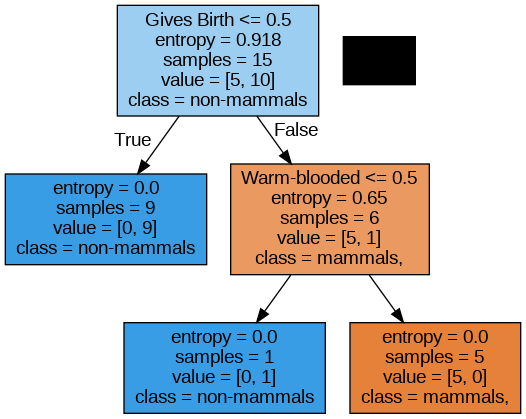

In [21]:
graph

Image(graph.create_png())

In [22]:
testData=[[ 'gila monister',0,0,0,0,1,1, 'non-mammals'],
['platypus', 1,0,0,0,1,1, 'mammals' ],
['owl', 1,0,0,1,1,0, 'non-mammals ' ],
['dolphin', 1,1,1,0,0,0, 'mammals ' ]]

In [23]:
type(testData)

list

In [24]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [25]:
testData=pd.DataFrame(testData, columns=data.columns)

In [26]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [34]:
testy=testData['Class']

In [35]:
testy

,Class
0,non-mammals
1,mammals
2,non-mammals
3,mammals


In [29]:
testx=testData.drop(['Name','Class'], axis=1)

In [30]:
testx

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [31]:
predy=clf.predict(testx)

In [32]:
predy

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [43]:
testy #ground truth

,Class
0,non-mammals
1,mammals
2,non-mammals
3,mammals


In [37]:
3/4*100 #Accuracy of the model

75.0

In [38]:
predictions=pd.concat([testData['Name'], testData['Class'] , pd.Series(predy, name='Predicted Class')], axis=1) #Displaying it in a better way

In [39]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(testy, predy)

0.25

In [45]:
print('Accuracy on test data is %.2f:' % (accuracy_score(testy, predy)))

Accuracy on test data is 0.25:


ANIMALS DATASET

In [46]:
import pandas as pd

In [47]:
data = pd.read_csv('/content/animals.csv', header = 'infer')

In [48]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [49]:
data.columns = data.columns.str.strip()

In [50]:
pd.crosstab([data['Hair'], data['Feathers'], data['Eggs'], data['Milk'], data['Airborne'], data['Aquatic'], data['Predator'], data['Teeth'], data['Backbone'], data['Breathes'], data['Venemous'], data['Fins'], data['Legs'], data['Tails'], data['Domestic'], data['Catsize']], data['Class'])

Class                                                                                                                1  \
Hair Feathers Eggs Milk Airborne Aquatic Predator Teeth Backbone Breathes Venemous Fins Legs Tails Domestic Catsize      
0    0        0    0    0        0       1        0     0        1        1        0    8    1     0        0        0   
                                 1       1        1     1        0        1        0    0    1     0        0        0   
                   1    0        1       1        1     1        1        0        1    0    1     0        1        2   
              1    0    0        0       0        0     0        1        0        0    0    0     0        0        0   
                                                                                        6    0     0        0        0   
                                         1        0     0        0        0        0    0    0     0        0        0   
                                                  1     1        1        0        0    0    1     0        0        0   
                                                                          1        0    0    1     0        0        0   
                                 1       0        1     1        0        0        1    0    1     0        0        0   
                                                                                                   1        0        0   
                                                                 1        0        0    4    0     0        0        0   
                                         1        0     0        0        0        0    4    0     0        0        0   
                                                                                        5    0     0        0        0   
                                                                                        6    0     0        0        0   
                                                                                        8    0     0        1        0   
                                                                          1        0    0    0     0        0        0   
                                                  1     1        0        0        1    0    1     0        0        0   
                                                                                                            1        0   
                                                                          1        1    0    1     0        1        0   
                                                                 1        0        0    4    0     0        0        0   
                                                                                             1     0        0        0   
                                                                          1        0    4    0     0        0        0   
                        1        0       0        0     0        1        0        0    6    0     0        0        0   
                                         1        0     0        1        0        0    6    0     0        0        0   
     1        1    0    0        0       0        0     1        1        0        0    2    1     0        1        0   
                                         1        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                 1       1        0     1        1        0        0    2    1     0        1        0   
                        1        0       0        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                                                                                

In [51]:
from sklearn import tree

In [52]:
y = data['Class']

In [53]:
X = data.drop(['Sr', 'Class'], axis=1)

In [54]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [56]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
clf = clf.fit(X,y)


In [58]:
import pydotplus

In [59]:
from IPython.display import Image

In [60]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '2', '3', '4', '5', '6', '7'],
                              filled=True, out_file=None)

In [61]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label="Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Backbone <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label="Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\\nva

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data)

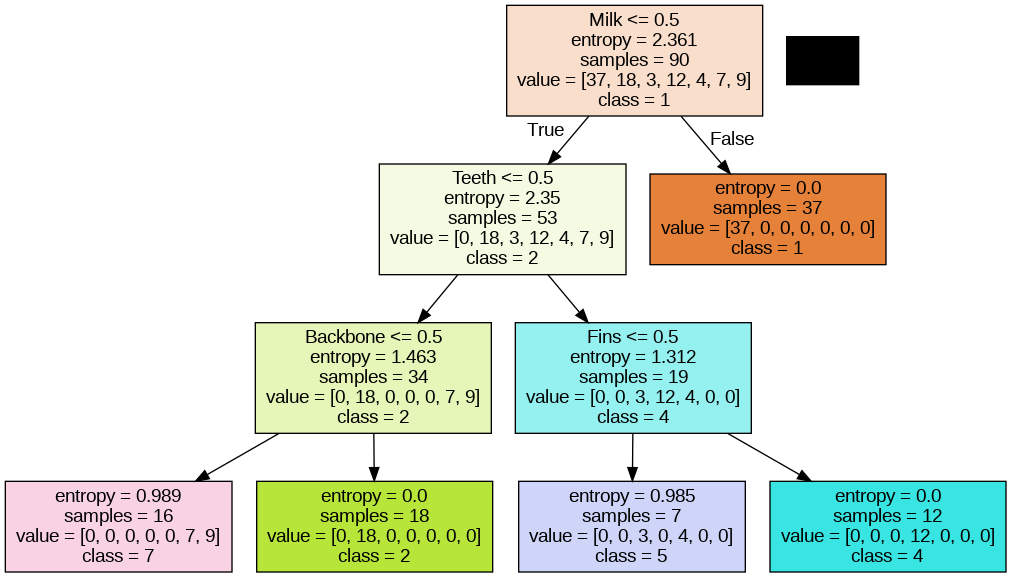

In [63]:
graph
Image(graph.create_png())

In [64]:
testData = [[91,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3],
            [92,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3],
            [93,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4],
            [94,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1],
            [95,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1],
            [96,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2],
            [97,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1],
            [98,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6],
            [99,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1],
            [100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7],
            [101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2]]

In [65]:
data.columns

Index(['Sr', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic',
       'Predator', 'Teeth', 'Backbone', 'Breathes', 'Venemous', 'Fins', 'Legs',
       'Tails', 'Domestic', 'Catsize', 'Class'],
      dtype='object')

In [66]:
testData = pd.DataFrame(testData, columns=data.columns)

In [67]:
testY = testData['Class']

In [68]:

testX = testData.drop(['Sr', 'Class'], axis=1)

In [70]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [69]:
import pydotplus

In [71]:
from IPython.display import Image

In [72]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1', '2', '3', '4', '5', '6', '7'], filled=True, out_file=None)

In [73]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label="Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Backbone <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label="Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\\nva

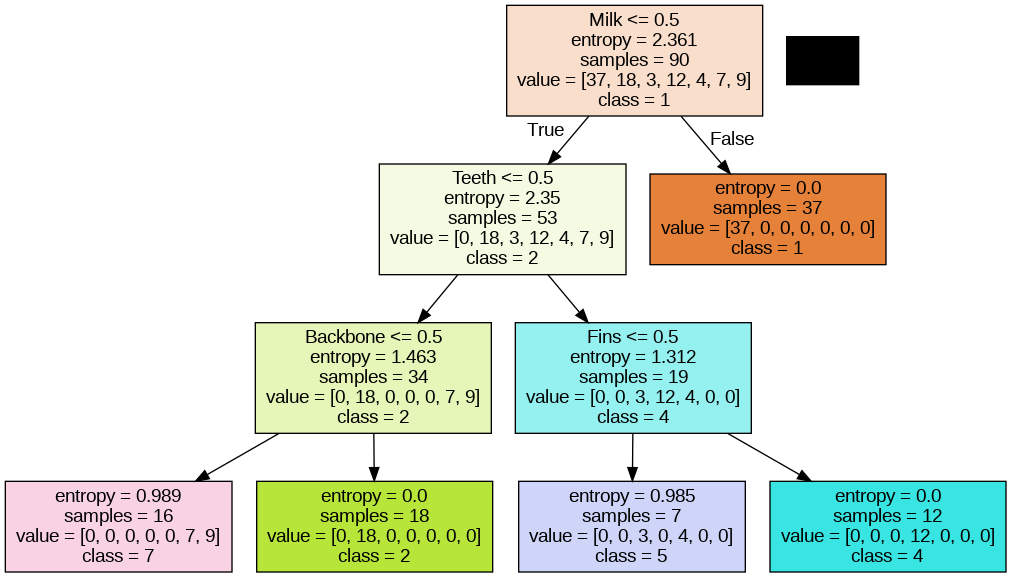

In [74]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [75]:
testData =[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
           [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
           [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
           [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]


In [76]:
testData

[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
 [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
 [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
 [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]

In [77]:
data.columns

Index(['Sr', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic',
       'Predator', 'Teeth', 'Backbone', 'Breathes', 'Venemous', 'Fins', 'Legs',
       'Tails', 'Domestic', 'Catsize', 'Class'],
      dtype='object')

In [78]:
testData = pd.DataFrame(testData, columns=data.columns)

In [79]:
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,91,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,7
1,92,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,5
2,93,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,4
3,94,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,3


In [80]:
testY = testData['Class']

In [81]:
testY

,Class
0,7
1,5
2,4
3,3


In [82]:
testX = testData.drop(['Sr', 'Class'], axis=1)

In [83]:
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1
1,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1
2,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1
3,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1


In [84]:
predY = clf.predict(testX)

In [85]:
predY

array([5, 1, 5, 5])

In [86]:
testY

,Class
0,7
1,5
2,4
3,3


In [87]:
predictions = pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name="Predicted Class")], axis=1)

In [88]:
predictions

,Sr,Class,Predicted Class
0,91,7,5
1,92,5,1
2,93,4,5
3,94,3,5


In [89]:
from sklearn.metrics import accuracy_score


In [90]:
accuracy_score(testY, predY)


0.0

In [91]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))


Accuracy on test data is 0.00
